# Исследование рынка заведений общественного питания Москвы

### Описание проекта  
 
Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.  

Для начала они просят вас — аналитика — подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.
Постарайтесь сделать презентацию информативной и лаконичной. Её структура и оформление сильно влияют на восприятие информации читателями вашего исследования. Выбирать инструменты (matplotlib, seaborn и другие) и типы визуализаций вы можете самостоятельно.  

Вам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

Описание данных  

Файл moscow_places.csv:  

name — название заведения;  
address — адрес заведения;  
category — категория заведения, например «кафе», «пиццерия» или «кофейня»;  
hours — информация о днях и часах работы;  
lat — широта географической точки, в которой находится заведение;  
lng — долгота географической точки, в которой находится заведение;  
rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);  
price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;  
avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:  
«Средний счёт: 1000–1500 ₽»;  
«Цена чашки капучино: 130–220 ₽»;  
«Цена бокала пива: 400–600 ₽».  
и так далее;  
middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:  
 Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
   Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
   Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.  
middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:  
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.  
chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):  
0 — заведение не является сетевым  
1 — заведение является сетевым  
district — административный район, в котором находится заведение, например Центральный административный округ;  
seats — количество посадочных мест.

## Шаг 1. Загрузим данные и изучим общую информацию. Выполним предобработку

In [38]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import graph_objects as go
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# импортируем карту и хороплет
from folium import Map, Choropleth, Marker
# импортируем кластер
from folium.plugins import MarkerCluster

ModuleNotFoundError: No module named 'folium'

In [39]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina' #используем для более красивых графиков. 
plt.rc('figure', figsize=(15, 6))

In [40]:
try:
    df = pd.read_csv('moscow_places.csv')
except:
    df = pd.read_csv('/datasets/moscow_places.csv')

In [41]:
# напишем функцию для обзора данных
def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.info())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.isna().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print('Количество дубликатов:', df.duplicated().sum())

In [42]:
df_review(df)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6),

## Шаг. Выполните предобработку данных

Для начала переведем все строковые данные в нижний регистр, для удобства и универсальности

In [43]:
for col in ['name', 'category', 'address', 'hours', 'price', 'avg_bill']:
    df[col] = df[col].str.lower()

In [44]:
df.head(3)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,0,45.0


In [45]:
# проверим неявные дубликаты.
df.duplicated(subset=['name', 'address']).sum()
print(len(df))
# удалим неявные дубликаты.
df = df.drop_duplicates(subset=['name', 'address'])
print(len(df))

8406
8402


In [46]:
print('Количество заведений:', df['name'].nunique())

Количество заведений: 5512


- Создадим столбец street с названиями улиц из столбца с адресом

In [47]:
df['street'] = df['address'].str.split(', ').str[1]
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица


- Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7): логическое значение True — если заведение работает ежедневно и круглосуточно; логическое значение False — в противоположном случае.

In [48]:
df['is_24/7'] = df['hours'].str.contains('ежедневно, круглосуточно')
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица,False


### Вывод по 1, 2 шагу:

В исходном датасете 8406 строк в таблице, 5512 заведений, тип данных соответствует значениям, изменять название столбцов не требуется.
Видим пропуски в столбцах hours, price, avg_bill, middle_avg_bill, middle_coffee_cup, seats. Пропусков в данных большое количество. Просто удалить их нельзя, т.к. будут искажения в исследовании, можем предположить что пропуски вызваны из-за разных категорий заведений.  
Полагаю, что заполнять средними или медианными значениями по названию заведения остальные столбцы некорректно, так как количество мест в сетевых заведениях, в разных районах, может отличаться. Также в мелких сетях, по условию, могут быть ошибки. Оставим пропуски как есть.  
Добавили столбцы с названиями улиц и с маркером работы 24/7

## Шаг. Анализ данных

### Категории заведений.  
Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации

In [49]:
category_name = df.groupby('category')['name'].count().reset_index()
category_name.columns = ['category', 'count']
category_name

,category,count
0,"бар,паб",764
1,булочная,256
2,быстрое питание,603
3,кафе,2376
4,кофейня,1413
5,пиццерия,633
6,ресторан,2042
7,столовая,315


In [50]:
go.Figure(data=[go.Pie(labels=category_name['category'], values= category_name['count'])], layout = go.Layout(title=go.layout.Title(text='Круговая диаграмма категорий заведений')))

In [52]:
fig = px.bar(category_name,
             x='category',
             y='count',
             text = 'count',
             #color = 'count',
             title = 'Количество заведений общественного питания по категориям'
             )
fig.update_layout(xaxis_title = 'Категории заведений',
                  yaxis_title = 'Количество заведений',
                  xaxis={'categoryorder':'total descending'})
fig.show()

NameError: name 'px' is not defined


*Вывод:*  
По количеству заведений лидируют кафе с численностью 2376, немного меньше ресторан - 2042. На последнем месте булочная - 256.

Кафе и рестораны составляют больше половины от всех заведений. Кофейни, бары/пабы и пиццерии составляют 1/3 от общего числа заведений. На булочные, столовые и быстрое питание приходится около 14%.

### Количество посадочных мест в заведениях по категориям. 
Исследуем количество посадочных мест в заведениях по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации

In [53]:
df.groupby('category')['seats'].describe().round(2).reset_index()

,category,count,mean,std,min,25%,50%,75%,max
0,"бар,паб",467.0,124.48,145.16,0.0,48.0,82.0,148.5,1288.0
1,булочная,148.0,89.39,97.69,0.0,25.0,50.0,120.0,625.0
2,быстрое питание,349.0,98.89,106.61,0.0,28.0,65.0,140.0,1040.0
3,кафе,1217.0,97.37,117.92,0.0,35.0,60.0,120.0,1288.0
4,кофейня,751.0,111.20,127.84,0.0,40.0,80.0,144.0,1288.0
5,пиццерия,427.0,94.50,112.28,0.0,30.0,55.0,120.0,1288.0
6,ресторан,1269.0,121.89,123.79,0.0,48.0,86.0,150.0,1288.0
7,столовая,164.0,99.75,122.95,0.0,40.0,75.5,117.0,1200.0


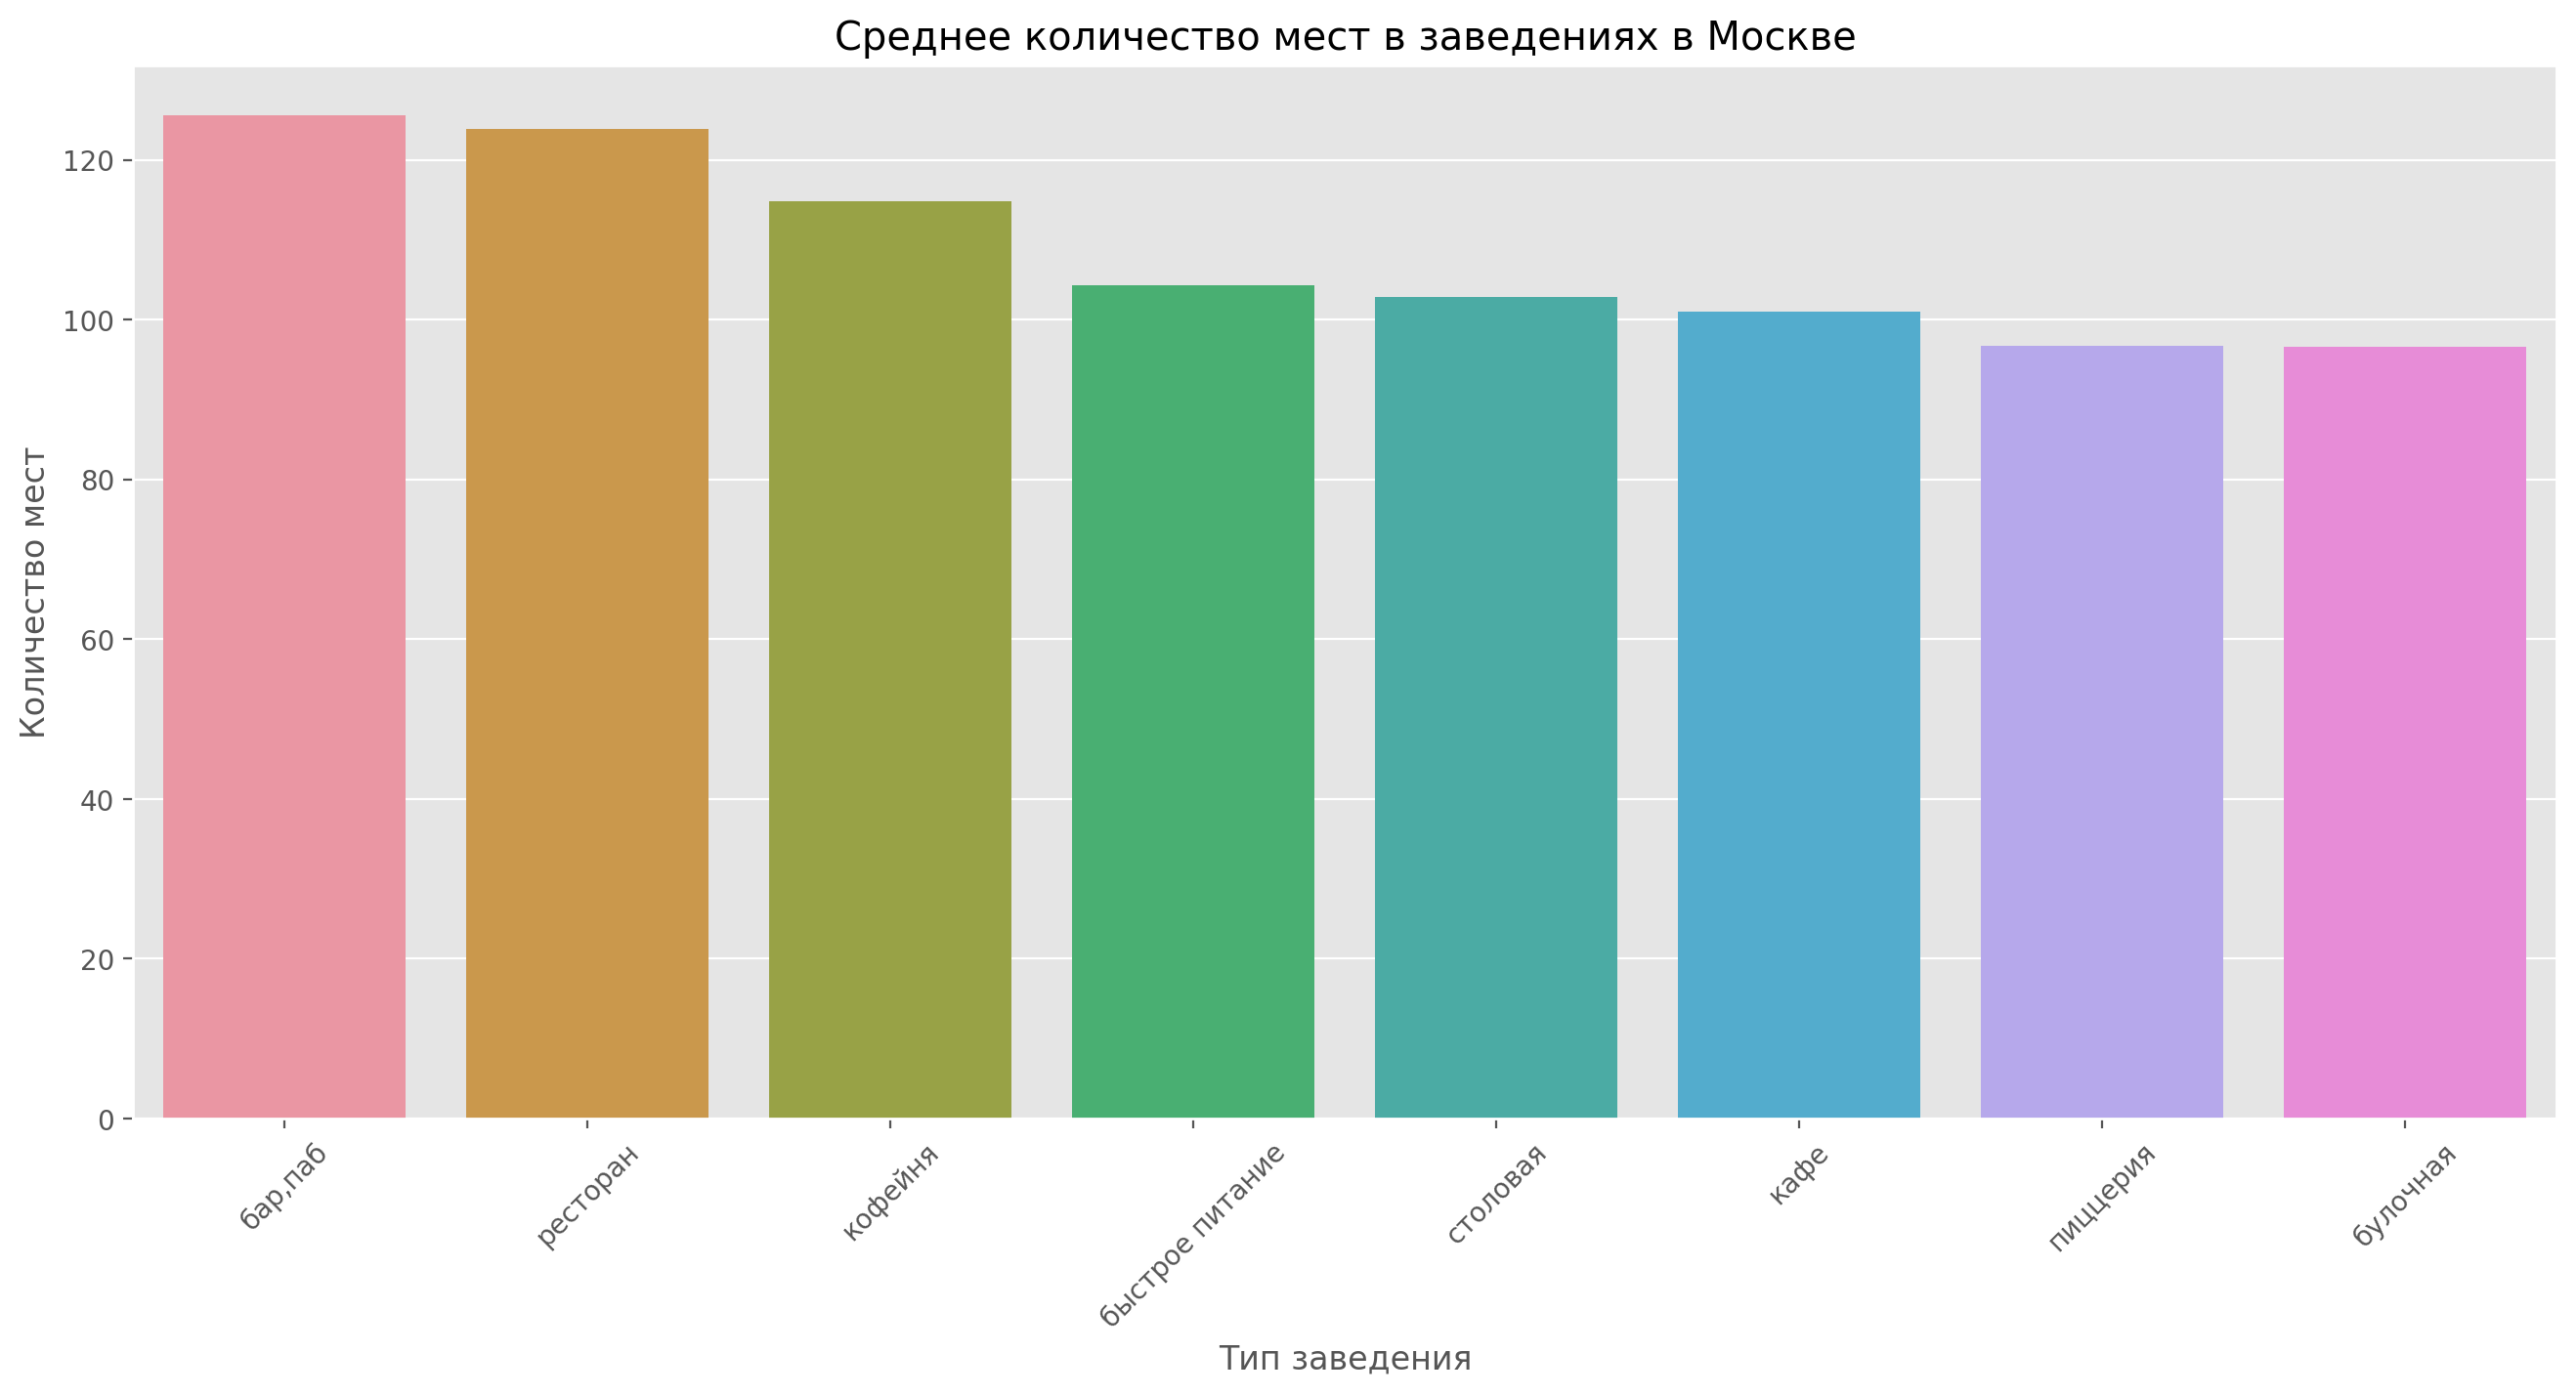

In [54]:
seats_mean = df[df['seats'] !=0].groupby('category')['seats'].mean().reset_index().sort_values(by='seats', ascending=False)

ax = plt.subplots(figsize=(16, 7))
ax = sns.barplot(data = seats_mean, x = 'category', y = 'seats')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество мест')
ax.set_title('Среднее количество мест в заведениях в Москве')
plt.xticks(rotation=45)
plt.show()

In [55]:
order = df.groupby(["category"])["seats"].median().sort_values(ascending=False).index

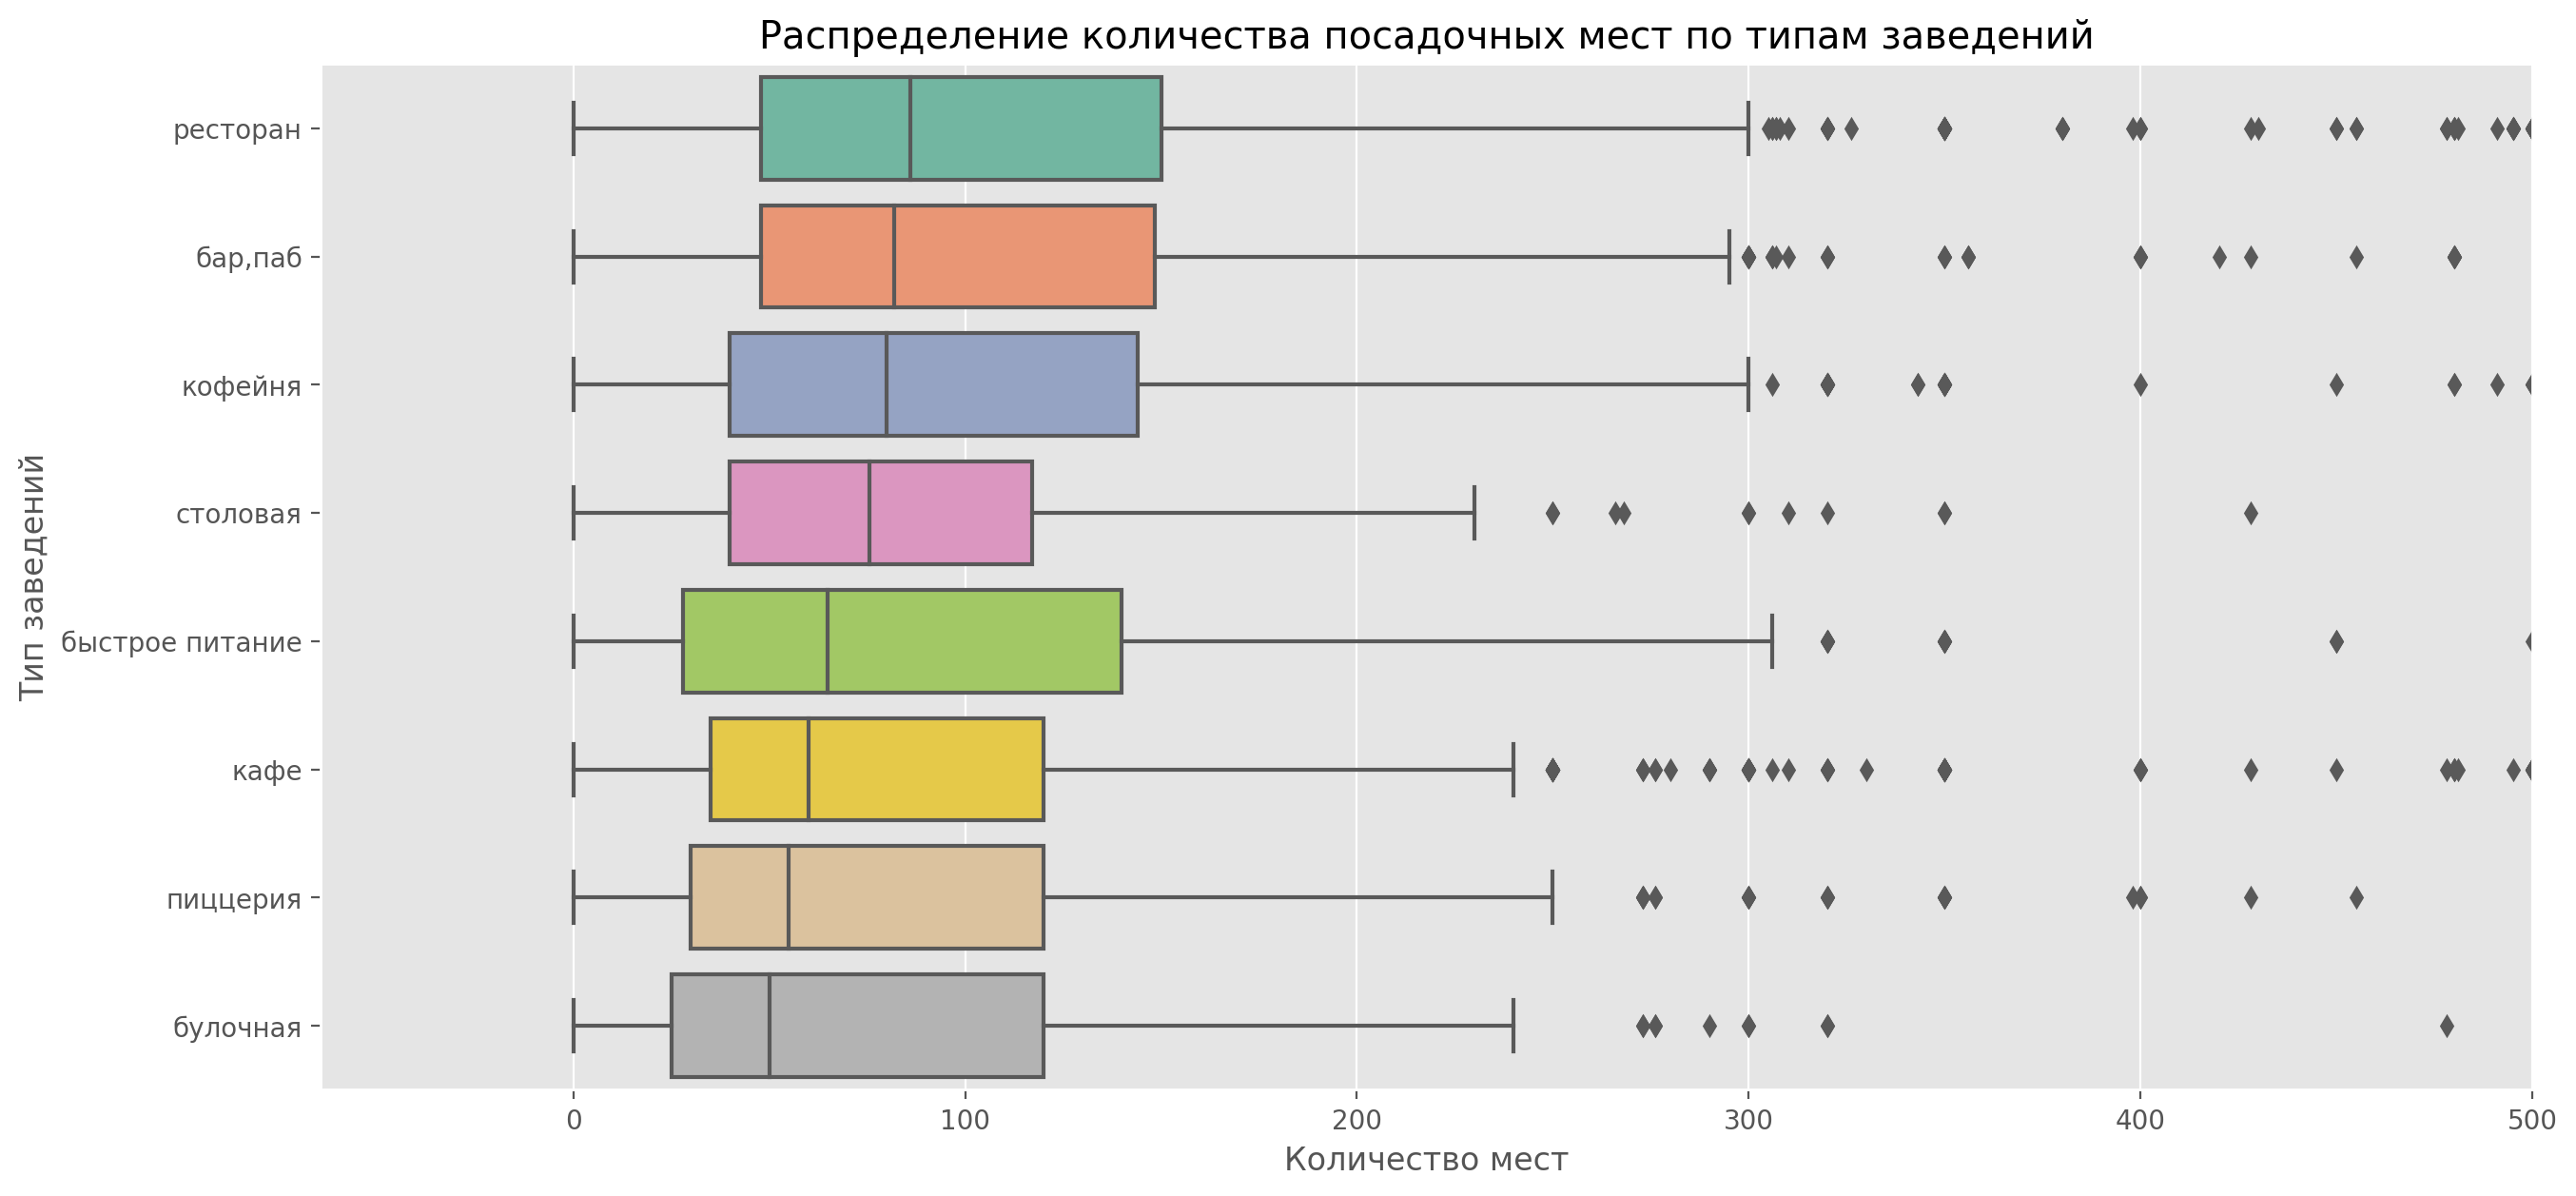

In [56]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=df, x='seats', y='category', palette="Set2", order = order)
plt.title('Распределение количества посадочных мест по типам заведений')
plt.xlabel('Количество мест')
plt.ylabel('Тип заведений')
plt.xlim(xmax= 500)
plt.show()

*Вывод:*  
Больше всего посадочных мест в ресторанах, что логично. Люди праздную свадьбы, проводят корпоративы и т.д. Далее идут заведения быстрого питания, т.к. они больше всего распространены в Москве. Кафе и столовые располагают для своих гостей меньшим количеством мест.

### Соотношение сетевых и несетевых заведений.  
Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете. Выясним каких заведений больше?

In [57]:
chain = df['chain'].value_counts().reset_index()
chain.columns = ['chain', 'count']
chain

,chain,count
0,0,5199
1,1,3203


In [58]:
#Визуализируем результаты на диаграмме
fig = go.Figure(data=[go.Pie(labels=['несетевые', 'сетевые'], values=chain['count'])], layout=go.Layout(
        title=go.layout.Title(text="Соотношение сетевых и несетевых заведений")))
fig.show()

*Вывод:*  
По графику видно, что почти 62% заведений в Москве - несетевые.

### Какие категории заведений чаще являются сетевыми?  
Исследуем данные и ответим на вопрос графиком.

In [59]:
chain_establishments = df.groupby(['category', 'chain'])['name'].count().reset_index()
chain_establishments.loc[chain_establishments['chain'] == 0, 'chain'] = 'не сетевое'
chain_establishments.loc[chain_establishments['chain'] == 1, 'chain'] = 'сетевое'
chain_establishments.columns = ['type', 'chain', 'count']
chain_establishments['chain'] = chain_establishments['chain'].astype(object)
chain_establishments = chain_establishments.sort_values(['count', 'chain'])
chain_establishments

,type,chain,count
15,столовая,сетевое,88
2,булочная,не сетевое,99
3,булочная,сетевое,157
1,"бар,паб",сетевое,168
14,столовая,не сетевое,227
5,быстрое питание,сетевое,232
10,пиццерия,не сетевое,303
11,пиццерия,сетевое,330
4,быстрое питание,не сетевое,371
0,"бар,паб",не сетевое,596


In [60]:
fig = px.bar(chain_establishments,
             x='count',
             y='type',
             text= 'count',
             color='chain',
             color_discrete_sequence=["#E69F00", "#56B4E9"],
             height=500,
             width=700
             )
fig.update_layout(title = 'Соотношение сетевых и несетевых заведений',
                  xaxis_title = 'Количество заведений',
                  yaxis_title = 'Категории')
fig.show()

NameError: name 'px' is not defined

*Вывод:*  
По графику видно, что большинство за несетевыми заведениями, но есть пара исключений:

кофейня - количество сетевых немного больше 720/693  
пиццерия - сетевых заведений больше 330/303  
булочная - сетевых заметно больше 157/99  

### Топ-15 популярных сетей в Москве.  
Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве.  
Построим подходящую для такой информации визуализацию. Узнаем есть ли какой-то признак, который их объединяет и к какой категории заведений они относятся?

In [61]:
data_chain = df[df['chain'] == 1]
top_15 = data_chain.groupby('name').agg({'rating': 'median', 'category' : pd.Series.mode, 'district' : 'count'})
top_15 = top_15.rename(columns={'district':'count'})
top_15 = top_15.sort_values('count', ascending = False).reset_index().head(15)
top_15

,name,rating,category,count
0,шоколадница,4.20,кофейня,120
1,домино'с пицца,4.20,пиццерия,76
2,додо пицца,4.30,пиццерия,74
3,one price coffee,4.20,кофейня,71
4,яндекс лавка,4.00,ресторан,69
5,cofix,4.10,кофейня,65
6,prime,4.20,ресторан,50
7,хинкальная,4.40,кафе,44
8,кофепорт,4.20,кофейня,42
9,кулинарная лавка братьев караваевых,4.40,кафе,39


In [62]:
fig = px.bar(top_15,
             x='count',
             y='name',
             text='count',
             color='name',
             height=500,
             width=1000
             )
fig.update_layout(title = 'Топ-15 популярных сетей Москвы',
                  xaxis_title = 'Количество заведений',
                  yaxis_title = 'Название заведений',
                  showlegend = False)
fig.show()

NameError: name 'px' is not defined

*Вывод:*  
Из графика видно, что самая популярная сеть - Шоколадница. Далее идёт доминос пицца, додо пицца. Сеть Му-Му замыкает топ.

In [63]:
print('Всего заведений в Топ-15:', top_15['count'].sum())

Всего заведений в Топ-15: 816


In [64]:
fig = px.bar(top_15,
             x='count', 
             y='category',
             color='category',
             text = 'name'
            )

fig.update_layout(title='Количество заведений по категориям из топ-15 популярных сетей Москвы',
                   xaxis_title='Количество заведений',
                   yaxis_title='Название категорий',
                   yaxis={'categoryorder':'total ascending'},
                   width=900,
                   height=500
                 )
fig.show()

NameError: name 'px' is not defined

*Вывод:*  
Всего заведений в топ-15 - 816.     
ожидаемо все заведения являются сетевыми  
самые популярные категории кофейня, кафе, ресторан, пиццерия и булочная  


### Административные районы Москвы.  
Какие административные районы Москвы присутствуют в датасете? Отобразим общее количество заведений и количество заведений каждой категории по районам. Проиллюстрируем эту информацию одним графиком.

In [65]:
print('Общее количество заведений в датасете:', df['name'].count())

Общее количество заведений в датасете: 8402


In [66]:
district_chain_data = df.groupby(['district', 'category']).agg({'rating': 'median', 'name': 'count'})
district_chain_data = district_chain_data.sort_values('rating', ascending=False).reset_index()
district_chain_data = district_chain_data.rename(columns={'name': 'count'})
district_chain_data.head()

,district,category,rating,count
0,Центральный административный округ,"бар,паб",4.5,364
1,Западный административный округ,"бар,паб",4.5,50
2,Северо-Западный административный округ,"бар,паб",4.4,23
3,Центральный административный округ,ресторан,4.4,670
4,Центральный административный округ,пиццерия,4.4,113


In [67]:
fig = px.bar(district_chain_data,
             x='count',
             y='district',
             color='category'
            )
fig.update_layout(title = 'Количество заведений каждой категории по районам Москвы',
                  xaxis_title = 'Количество заведений',
                  yaxis_title = 'Название района',
                  yaxis={'categoryorder': 'total ascending'}
)
fig.show()

NameError: name 'px' is not defined

*Вывод:*  
Количество районов - 9. По графику видно, что больше всего заведений располагается в Центральном административном округе. В нем преобладают кафе, кофейни и рестораны. Кафе распределены равномерно по всем округам. Столовых и булочных меньше всего по всем округам.

### Cредние рейтинги по категориям заведений  
Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

In [68]:
category_rating = df.groupby('category').agg({'rating': 'mean'}).round(2).sort_values('rating', ascending=False).reset_index()
category_rating

,category,rating
0,"бар,паб",4.39
1,пиццерия,4.30
2,ресторан,4.29
3,кофейня,4.28
4,булочная,4.27
5,столовая,4.21
6,кафе,4.12
7,быстрое питание,4.05


In [69]:
fig = px.bar(category_rating,
             x='rating',
             y='category',
             text='rating',
             color='category'
            )
fig.update_layout(title='Распределение средних рейтингов по категориям заведений',
                  xaxis_title='Рейтинг',
                  yaxis_title='Название категорий')
fig.update_xaxes(range=[4, 4.5])
fig.show()

NameError: name 'px' is not defined

*Вывод:*  
Из графика видно, что у категорий бар/паб наивысший рейтинг 4.39. У пиццерий, ресторанов, кофеин и булочных примерно одинаковый рейтинг. Самый маленький рейтинг у ресторанов быстрого питания. Также видно, что по всем заведениям рейтинг выше 4, что достаточно хорошо.

### Фоновая картограмму (хороплет) со средним рейтингом заведений каждого района   
Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson.

In [70]:
rating_df = df.groupby('district', as_index=False)['rating'].agg('mean').round(2)
rating_df

,district,rating
0,Восточный административный округ,4.17
1,Западный административный округ,4.18
2,Северный административный округ,4.24
3,Северо-Восточный административный округ,4.15
4,Северо-Западный административный округ,4.21
5,Центральный административный округ,4.38
6,Юго-Восточный административный округ,4.10
7,Юго-Западный административный округ,4.17
8,Южный административный округ,4.18


In [71]:
# подключаем модуль для работы с JSON-форматом
import json

# читаем файл и сохраняем в переменной
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/admin_level_geomap.geojson'

In [72]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

NameError: name 'Map' is not defined

*Вывод:*  
По данным видно, что самый высокий рейтинг в заведениях в Центральном админинстративном округе - 4.38. Самый низкий - в Юго-Восточном админинстратвном округе - 4.1.

### Pаведения датасета на карте с помощью кластеров  
Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium

In [73]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# функция, принимающая строку датафрейма, создает маркер в текущей точке и
# добавляет его в кластер marker_cluster

def create_cluster(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)
    
# к каждой строке датафрейма применяем функцию
df.apply(create_cluster, axis=1)

# выводим карту
m

NameError: name 'Map' is not defined

*Вывод:*  
Видно, что основная масса заведений располагаются в центре Москвы.

### Топ-15 улиц по количеству заведений  
Найдём топ-15 улиц по количеству заведений. Построим график распределения количества заведений и их категорий по этим улицам. 

In [74]:
msc_streets = df[df['street'].notnull()]
top15_streets = msc_streets['street'].value_counts().reset_index().head(15)
top15_streets.columns = ['street', 'count']
top15_streets


,street,count
0,проспект мира,183
1,профсоюзная улица,122
2,проспект вернадского,108
3,ленинский проспект,107
4,ленинградский проспект,95
5,дмитровское шоссе,88
6,каширское шоссе,77
7,варшавское шоссе,76
8,ленинградское шоссе,70
9,мкад,65


In [75]:
# таблица со столбцами - улица - категоория - количество

streets_category = df.groupby(['street', 'category'])['name'].count().reset_index()
streets_category.columns = ['street', 'category', 'count']
streets_category.sort_values('count', ascending=False)

,street,category,count
2137,проспект мира,кафе,53
1520,мкад,кафе,45
2140,проспект мира,ресторан,45
2138,проспект мира,кофейня,36
2149,профсоюзная улица,кафе,35
...,...,...,...
1536,молодёжная улица,кофейня,1
1538,монтажная улица,кофейня,1
1539,монтажная улица,ресторан,1
1540,москворецкая набережная,кофейня,1


In [76]:
# улицы из топ15

streets_top15_category = streets_category[streets_category['street'].isin(top15_streets['street'])]
streets_top15_category

,street,category,count
698,варшавское шоссе,"бар,паб",6
699,варшавское шоссе,быстрое питание,7
700,варшавское шоссе,кафе,18
701,варшавское шоссе,кофейня,14
702,варшавское шоссе,пиццерия,4
...,...,...,...
3174,улица миклухо-маклая,быстрое питание,4
3175,улица миклухо-маклая,кафе,21
3176,улица миклухо-маклая,кофейня,4
3177,улица миклухо-маклая,пиццерия,2


In [77]:
fig = px.bar(streets_top15_category, 
             x='count', 
             y='street',                    
             color='category'
            )

fig.update_layout(title='Топ-15 улиц по количеству заведений',
                   xaxis_title='Количество заведений',
                   yaxis_title='Название улиц',
                   yaxis={'categoryorder':'total ascending'}
                 )
fig.show()

NameError: name 'px' is not defined

*Вывод:*  
Из графика можно заметить, что больше всего заведений на проспекте Мира. Преобладают кафе и рестораны. Далее идет Профсоюзная улица. По категориям заведений ситуация схожая.

### Улицы, на которых находится только один объект общепита  
Найдём улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

In [78]:
streets_with_one_cafe = df['street'].value_counts().reset_index()
streets_with_one_cafe.columns = ['street', 'count_cafe']
streets_with_one_cafe = streets_with_one_cafe[streets_with_one_cafe['count_cafe']==1]
streets_with_one_cafe

,street,count_cafe
990,талдомская улица,1
991,улица фотиевой,1
992,2-й верхний михайловский проезд,1
993,3-й михалковский переулок,1
994,малая тульская улица,1
...,...,...
1442,малый казённый переулок,1
1443,улица маршала соколовского,1
1444,улица максимова,1
1445,басманный тупик,1


In [79]:
# посмотрим к каким категориям относятся заведения
streets_category_new = streets_category[streets_category['street'].isin(streets_with_one_cafe['street'])]
streets_category_new = streets_category_new.groupby('category')['street'].count().sort_values(ascending=False)
display(streets_category_new)
print('Всего улиц с одним заведением:', streets_category_new.sum())

category
кафе               159
ресторан            93
кофейня             84
бар,паб             39
столовая            36
быстрое питание     23
пиццерия            15
булочная             8
Name: street, dtype: int64

Всего улиц с одним заведением: 457


*Вывод:*  
Видно, что 457 улиц имеют только одно заведение.  
На не популярных улицах больше всего кафе
далее идут рестораны и кофейни
всех остальных категорий очень мало
Можно предположить что связано это с тем, что такие заведения как столовая, бар, пиццерия и быстрое питание, открывают там где большой поток клиентов. А кафе, ресторан и кофейни, могут открывать в местах где нет конкурентов и без огромной проходимости.

### Значения средних чеков заведений.  
Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитаем медиану этого столбца для каждого района. Используем это значение в качестве ценового индикатора района. Построим фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируем цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

In [80]:
median_bill = df.groupby('district')['middle_avg_bill'].median().reset_index()
median_bill

,district,middle_avg_bill
0,Восточный административный округ,575.0
1,Западный административный округ,1000.0
2,Северный административный округ,650.0
3,Северо-Восточный административный округ,500.0
4,Северо-Западный административный округ,700.0
5,Центральный административный округ,1000.0
6,Юго-Восточный административный округ,450.0
7,Юго-Западный административный округ,600.0
8,Южный административный округ,500.0


In [81]:
# создаем карту Москвы

mm = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# хороплет
Choropleth(
    geo_data=state_geo,
    data = median_bill,
    columns = ['district', 'middle_avg_bill'],
    key_on = 'feature.name',
    legend_name = 'Средний чек заведений по районам',
).add_to(mm)

mm

NameError: name 'Map' is not defined

*Вывод:*  
Ожидаемо самый дорогой средний чек в ЦАО и ЗАО (самые дорогие районы Москвы)
самые дешевый средний чек в СВАО и ЮВАО
остальные районы не сильно отличаются друг от друга
В целом отдаление от центра дальше чем за ЦАО не сильно влияет на средний чек, дальше работает правильно "дорогой район - дороже, дешевый - дешевле"

### Общий вывод:
Был проведен анализ заведений общественного питания Москвы. По количеству заведений лидируют кафе с количеством 2364(28.3%), чуть меньше рестораны - 2031(24.3%). Категория булочные на последнем месте - 255(3.05%).

Также проанализировали, что больше всего посадочных мест предоставляют рестораны. Что логично, т.к. люди оычно празднуют там события с большой численностью людей (свадьбы, корпоративы и тд.). Далее идут заведения быстрого питания, т.к они больше всего распространены в Москве.

Для кафе и столовых посадочных мест меньше всего.

В Москве 61.9% мест являются несетевыми. По графику видно, что большинство за несетевыми заведениями. Но есть пара исключений:

кофейня - количество сетевых немного больше. 713/688

пиццерия - сетевых заведений больше. 328/301

булочная - сетевых заметно больше. 156/99

Самая популярная сеть в Москве - Шоколадница. На втором и третьем месте расположились известные пиццерии.

Всего заведений в топ-15 - 811. По графику наглядно видно, что большая часть приходится на кофейни. У ресторанов, пиццерий и кафе примерно равное количество.

Из топ-15 больше всего заведений находятся в Центральном админинстративном округе. В основном это кафе, кофейни и рестораны. Примерно одинаковые показатели у Южного, Северного, Северо-Восточного и Западного админинстративных округов. Здесь приоритеты меняются в сторону категории быстрого питания. Меньше всего заведений из топ-15 в Северо-Западном админинстративном округе.

Количество районов - 9. По графику видно, что больше всего заведений располагается в Центральном админинстративном округе. В нем преобладают кафе, кофейни и рестораны. Кафе распределены равномерно по всем округам. Столовых меньше всего по всем округам.

У категорий бар/паб наивысший рейтинг 4.39. У пиццерий, ресторанов, кофеин и булочных примерно одинаковый рейтинг. Самый маленький рейтинг у ресторанов быстрого питания. Также видно, что по все заведениям рейтинг выше 4, что достаточно хорошо.

Самый высокий рейтинг в заведениях в Центральном админинстративном округе - 4.38. Самый низкий - в Юго-Восточном админинстратвном округе - 4.1.

Основная масса заведений располагаются в центре Москвы.

Больше всего заведений на проспекте Мира. Преобладают кафе и рестораны. Далее идет Профсоюзная улица. По заведениям ситуация схожая.

На не популярных улицах больше всего кафе, рестораны и кофейни  

Самый дорогой средний чек в ЦАО и ЗАО (самые дорогие районы Москвы), а самый дешевый средний чек в СВАО и ЮВАО.



##  Шаг. Детализируем исследование: открытие кофейни

Ответим на следующие вопросы:  
- Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?  
- Есть ли круглосуточные кофейни?  
- Какие у кофеен рейтинги? Как они распределяются по районам?  
- На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

### Количество кофеен

In [82]:
coffee_data = df[df['category'] == 'кофейня']
print('Количество кофеен:', len(coffee_data))

Количество кофеен: 1413


In [83]:
# создаем карту
mmm = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаем пустой кластер и добавляем его на карту
marker_cluster = MarkerCluster().add_to(mmm)

# функция, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
coffee_data.apply(create_clusters, axis=1)

# выводим карту
mmm

NameError: name 'Map' is not defined

*Вывод:*  
Всего 1413 заведение в категории кофейня. Большая часть заведений располагается в Центральном районе. Меньше всего заведений - в восточной и южной частях города.

### Время работы. Есть ли круглосуточные кофейни?

In [84]:
coffee_24_7 = coffee_data[coffee_data['is_24/7'] == True]
print('Количество круглосуточных кофеен:', len(coffee_24_7))

Количество круглосуточных кофеен: 59


In [85]:
# создаём карту Москвы
mmmm = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(mmmm)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
coffee_24_7.apply(create_clusters, axis=1)

# выводим карту
mmmm

NameError: name 'Map' is not defined

*Вывод:*  
Количество круглосуточных кофеен - 59. По карте видно, что большинство находится в центре города. Это логично, т.к. ночью люди любят гулять по центру и спрос на кофе присутствует. В других районах это не распространено.

### Рейтиги и цены

In [86]:
coffee_rating = coffee_data.groupby('district', as_index=False)['rating'].agg('mean').round(2).sort_values('rating', ascending=False)
coffee_rating

,district,rating
5,Центральный административный округ,4.34
4,Северо-Западный административный округ,4.33
2,Северный административный округ,4.29
0,Восточный административный округ,4.28
7,Юго-Западный административный округ,4.28
6,Юго-Восточный административный округ,4.23
8,Южный административный округ,4.23
3,Северо-Восточный административный округ,4.22
1,Западный административный округ,4.20


In [87]:
# создаём карту
mmmmm = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    legend_name='Средний рейтинг кофеен по районам',
).add_to(mmmmm)

# выводим карту
mmmmm

NameError: name 'Map' is not defined

*Вывод:* Самый высокий рейтинг в округах: Центральный административный округ и Северо-Западный административный округ. Самый низкий рейтинг у Западного административного округа.


### Стоимость чашки капучино

In [88]:
cup_of_coffee = coffee_data.groupby('district', as_index=False)['middle_coffee_cup'].agg('mean').round(2).sort_values('middle_coffee_cup', ascending=False)
display(cup_of_coffee)
coffee_price = round(cup_of_coffee['middle_coffee_cup'].mean(), 2)
print(f'Средняя стоимость чашки кофе в Москве:', coffee_price)

,district,middle_coffee_cup
1,Западный административный округ,189.94
5,Центральный административный округ,187.52
7,Юго-Западный административный округ,184.18
0,Восточный административный округ,174.02
2,Северный административный округ,165.79
4,Северо-Западный административный округ,165.52
3,Северо-Восточный административный округ,165.33
8,Южный административный округ,158.49
6,Юго-Восточный административный округ,151.09


Средняя стоимость чашки кофе в Москве: 171.32


In [89]:
m_6 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=cup_of_coffee,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    legend_name='Средняя цена чашки кофе по районам',
).add_to(m_6)

# выводим карту
m_6

NameError: name 'Map' is not defined

*Вывод:*  
Самый дорогой кофе в Западном(188.56) и Центральном округах(187.52). Средняя стоимость чашки кофе для Москвы - 171.32

*Рекомендации:*  
При открытии кофейни стоит рассмотреть следующие районы: Центральный, Западный и Юго-Западный, т.к. в этих районах высокая стоимость чашки кофе. Это позволит немного снизить цену на старте продаж без существенных потерь для привлечения клиентов. Если рассматривать открытие в Центральном районе, то лучше ориентироваться на круглосуточный режим работы, т.к. это самый оживленный район в ночное время. На Западном и Юго-Западном направлении круглосуточных точек мало. Возможно, стоит попробовать поэкспериментировать с круглосуточным режимом работы и посмотреть будут ли в ночное время посетители. Если посетители будут, то это будет большим плюсом для бизнеса, т.к. в этих районах конкурентов в ночное время мало. Также можно отметить, что Западный район привлекателен для открытия тем, что в нем самый низкий средний рейтинг у кофеин, что может стать преимуществом при открытии нового заведения и при успешном старте можно стать самым популярным заведением в данном районе. Как мне кажется, открытие заведений с хорошим рейтингом из Центрального района в других районах (по франшизе) - также хороший вариант, т.к. в Центральном районе очень большая проходимость и количество отзывов и рейтинг Центрального района может хорошо повлиять на заведение и в других районах.

Презентация: <https://disk.yandex.ru/i/Iv-5BxQr7Wn0HQ>